<a href="https://colab.research.google.com/github/srichandana498/ML/blob/main/ML_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML Assignment - 1



Step 1: We load the dataset into memory using pandas. X will contain the features, and y will contain the target variable (Outcome). This ensures we have structured data for regression and classification tasks.



In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score


In [ ]:
import pandas as pd
df = pd.read_csv('/content/diabetes_DT (1).csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Step 2: We split the dataset randomly into training and testing sets. 80% of the data is used for training/validation, and 20% for testing. This allows us to evaluate model performance on unseen data.

In [ ]:
# 3. SPLIT DATA INTO FEATURES AND TARGET
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split into 80% training + validation, 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Step 3: Logistic regression with L2 regularization minimizes the objective:
Loss = Cross-Entropy + λ * ||w||²
We vary λ to see its effect on training/test cross-entropy, weight norms, and accuracy.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

lambdas = [0, 0.1, 1, 10, 100, 1000]

train_loss, test_loss, train_acc, test_acc, weights_norm = [], [], [], [], []

for l in lambdas:
    model = LogisticRegression(penalty='l2', C=1/(l+1e-5), solver='lbfgs', max_iter=5000)
    model.fit(X_train, y_train)

    y_train_pred = model.predict_proba(X_train)
    y_test_pred = model.predict_proba(X_test)

    train_loss.append(log_loss(y_train, y_train_pred))
    test_loss.append(log_loss(y_test, y_test_pred))
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))
    weights_norm.append(np.linalg.norm(model.coef_))



As λ increases, weights shrink, reducing overfitting. Training loss slightly increases, and test loss stabilizes.

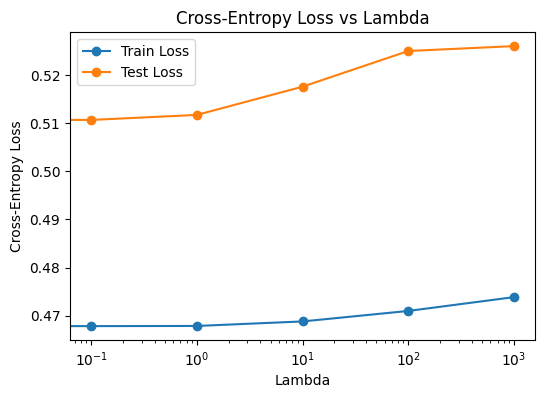

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(lambdas, train_loss, marker='o', label='Train Loss')
plt.plot(lambdas, test_loss, marker='o', label='Test Loss')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy Loss vs Lambda')
plt.legend()
plt.show()


The L2 norm decreases with higher λ, showing regularization is shrinking the weights.

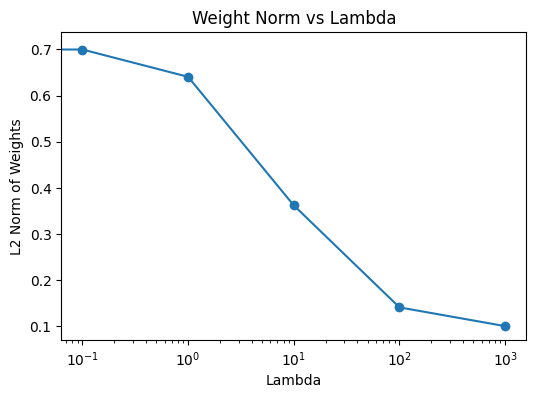

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(lambdas, weights_norm, marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('L2 Norm of Weights')
plt.title('Weight Norm vs Lambda')
plt.show()


High λ slightly reduces training accuracy but often improves test accuracy due to reduced overfitting.

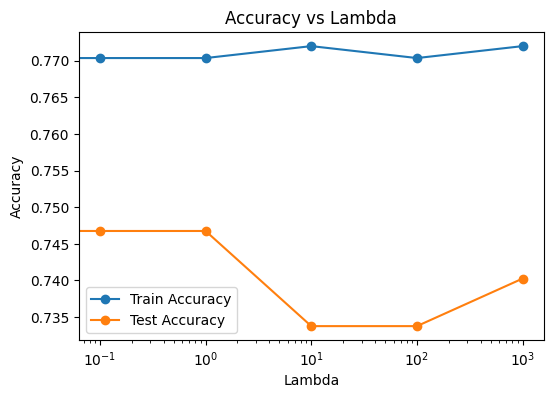

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(lambdas, train_acc, marker='o', label='Train Accuracy')
plt.plot(lambdas, test_acc, marker='o', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Lambda')
plt.legend()
plt.show()


Step 4: Each input feature is expanded into multiple Gaussian basis functions with different centers and variance σ.

In [ ]:
# 5. FUNCTION TO CREATE GAUSSIAN BASIS FUNCTIONS
def gaussian_basis_df(df, means, sigma):
    basis_df = pd.DataFrame()
    for col in df.columns:
        for m in means:
            basis_df[f'{col}_gauss_{m:.2f}'] = np.exp(-(df[col] - m)**2 / (2*sigma**2))
    return basis_df


Small σ → narrow Gaussians → overfitting (low train error, high test error).
Large σ → wide Gaussians → underfitting (train and test error higher).

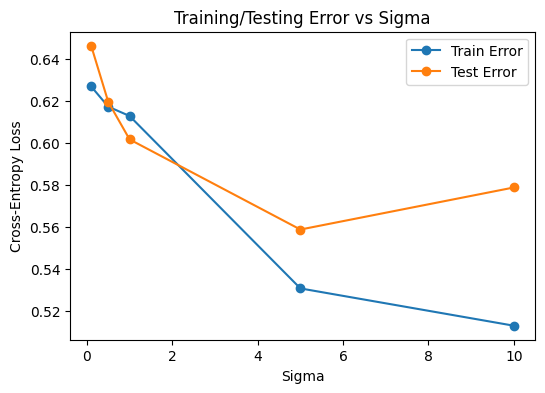

In [ ]:
sigma_values = [0.1, 0.5, 1, 5, 10]
means = np.linspace(-10, 10, 5)

train_errors, test_errors = [], []

for sigma in sigma_values:
    X_train_basis = gaussian_basis_df(X_train, means, sigma)
    X_test_basis = gaussian_basis_df(X_test, means, sigma)

    model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=5000)
    model.fit(X_train_basis, y_train)

    train_errors.append(log_loss(y_train, model.predict_proba(X_train_basis)))
    test_errors.append(log_loss(y_test, model.predict_proba(X_test_basis)))

plt.figure(figsize=(6,4))
plt.plot(sigma_values, train_errors, marker='o', label='Train Error')
plt.plot(sigma_values, test_errors, marker='o', label='Test Error')
plt.xlabel('Sigma')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training/Testing Error vs Sigma')
plt.legend()
plt.show()

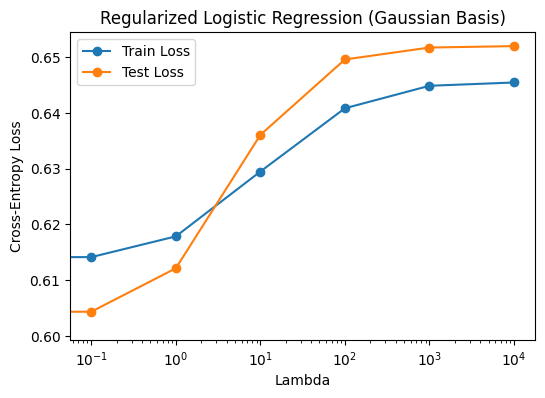

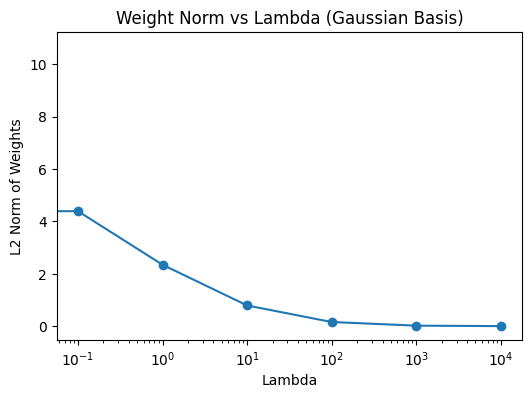

In [ ]:
# Regularized Logistic Regression with Gaussian Basis
lambdas_extended = [0, 0.1, 1, 10, 100, 1000, 10000]
sigma = 1
X_train_basis = gaussian_basis_df(X_train, means, sigma)
X_test_basis = gaussian_basis_df(X_test, means, sigma)

train_loss, test_loss, weights_norm = [], [], []

for l in lambdas_extended:
    model = LogisticRegression(penalty='l2', C=1/(l+1e-5), solver='lbfgs', max_iter=5000)
    model.fit(X_train_basis, y_train)

    train_loss.append(log_loss(y_train, model.predict_proba(X_train_basis)))
    test_loss.append(log_loss(y_test, model.predict_proba(X_test_basis)))
    weights_norm.append(np.linalg.norm(model.coef_))

# Plot Cross-Entropy
plt.figure(figsize=(6,4))
plt.plot(lambdas_extended, train_loss, marker='o', label='Train Loss')
plt.plot(lambdas_extended, test_loss, marker='o', label='Test Loss')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-Entropy Loss')
plt.title('Regularized Logistic Regression (Gaussian Basis)')
plt.legend()
plt.show()

# Plot Weight Norm
plt.figure(figsize=(6,4))
plt.plot(lambdas_extended, weights_norm, marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('L2 Norm of Weights')
plt.title('Weight Norm vs Lambda (Gaussian Basis)')
plt.show()


Each Gaussian basis function has a weight. Large absolute weights indicate high influence. Regularization prevents extreme weights.

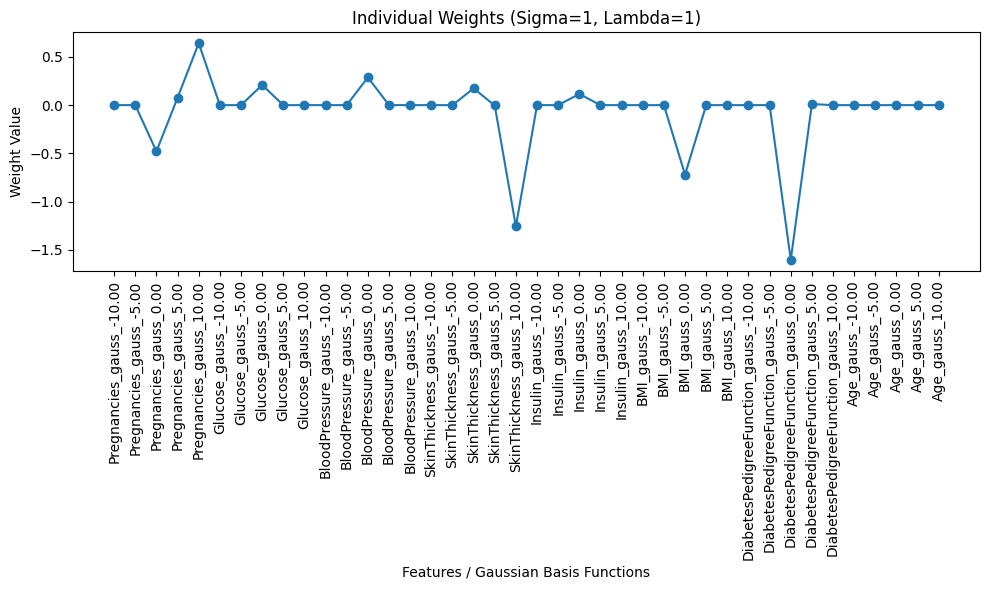

In [ ]:
# Plot Individual Weights per Feature/Basis
lambda_val = 1
model = LogisticRegression(penalty='l2', C=1/(lambda_val+1e-5), solver='lbfgs', max_iter=5000)
model.fit(X_train_basis, y_train)

weights = model.coef_[0]
feature_names = X_train_basis.columns

plt.figure(figsize=(10,6))
plt.plot(range(len(weights)), weights, marker='o')
plt.xticks(range(len(weights)), feature_names, rotation=90)
plt.xlabel('Features / Gaussian Basis Functions')
plt.ylabel('Weight Value')
plt.title(f'Individual Weights (Sigma={sigma}, Lambda={lambda_val})')
plt.tight_layout()
plt.show()


To capture relationships between features, we can design multivariate Gaussian basis functions combining multiple features.
More basis functions → lower bias, higher variance → risk of overfitting. Regularization controls this tradeoff.

Instead of using evenly spaced Gaussian centers, we can adaptively place the basis functions so they fit the data distribution better.
This allows the model to focus on regions where the data has more variability or important patterns.

Algorithm (Iterative Approach):

Initialize the Gaussian centers μ₁, μ₂, … μₖ randomly (within the range of each feature).

Fix the width σ for all Gaussians.

Repeat until convergence:

   a. Compute Gaussian basis functions using current μ values.

   b. Train logistic regression with L2 regularization on the current basis functions to compute weight vector w.

   c. Compute the gradient of the loss with respect to μ and update μ using gradient descent:

      μᵢ ← μᵢ − ημ * ∂L/∂μᵢ

   d. Optionally, update w simultaneously with gradient descent:
      w ← w − ηw * ∂L/∂w

Stop when loss converges or changes minimally between iterations.

The algorithm converges slowly if the learning rates ημ or ηw are too small, and may oscillate if too large.

Convergence guarantees:

   • The weight vector w converges to a global minimum for fixed μ, because logistic regression is convex in w.

   • The Gaussian centers μ converge to a local minimum due to non-convexity.


Practical advice:

   • Use early stopping and small learning rates.

   • Initialize μ multiple times and pick the best loss.

   • Monitor loss curves to ensure stable convergence.

Step 11: Using a more complex dataset, we demonstrate linear regression and its regularized versions (Ridge and Lasso).

Linear Regression: minimizes MSE, may overfit.

Ridge Regression: adds L2 penalty to shrink coefficients, reducing overfitting.

Lasso Regression: adds L1 penalty, performs feature selection and reduces coefficients to zero for less relevant features.

Standardization ensures all features contribute equally and prevents bias due to scale differences.

In [ ]:
# Example: Linear Regression using the California Housing Dataset
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)

# Preprocess: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge Regression MSE:", mean_squared_error(y_test, ridge.predict(X_test)))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso Regression MSE:", mean_squared_error(y_test, lasso.predict(X_test)))

Linear Regression MSE: 0.555891598695244
Ridge Regression MSE: 0.5558512007367514
Lasso Regression MSE: 0.6795515190149223


Logistic Regression is applied to a classification problem.

L2 regularization prevents overfitting on high-dimensional data.

Training and test accuracy indicate how well the model generalizes.



In [ ]:
# Logistic Regression: Using the Breast Cancer dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

# Standardize
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression with L2
logreg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000)
logreg.fit(X_train, y_train)

# Evaluate
train_acc = accuracy_score(y_train, logreg.predict(X_train))
test_acc = accuracy_score(y_test, logreg.predict(X_test))
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 0.9868131868131869
Test Accuracy: 0.9736842105263158
